# Import libraries and load datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

In [2]:
path = r'C:\Users\Michael\Desktop\Career Foundry\03 Machine Learning\02 Real-World Applications of Machine Learning\Data Sets'

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
X = pd.read_csv(os.path.join(path,'DATASET weather_prediction_imputed.csv'), index_col = False)

In [5]:
X.head(10)

YEAR  MONTH  DAY  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0  1960      1    1                  7            0.85           1.018   
1  1960      1    2                  6            0.84           1.018   
2  1960      1    3                  8            0.90           1.018   
3  1960      1    4                  3            0.92           1.018   
4  1960      1    5                  6            0.95           1.018   
5  1960      1    6                  1            0.78           1.018   
6  1960      1    7                  3            0.87           1.018   
7  1960      1    8                  8            0.95           1.018   
8  1960      1    9                  8            0.98           1.018   
9  1960      1   10                  3            0.74           1.018   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.32                 0.09             0.7   
1                    0.36                 1.05             1.1   
2                    0.18                 0.30             0.0   
3                    0.58                 0.00             4.1   
4                    0.65                 0.14             5.4   
5                    0.76                 0.00             7.7   
6                    0.66                 0.00             5.4   
7                    0.19                 0.09             0.0   
8                    0.19                 0.56             0.0   
9                    0.38                 0.01             1.1   

   BASEL_temp_mean  ...  STOCKHOLM_temp_max  VALENTIA_cloud_cover  \
0              6.5  ...                 4.9                     5   
1              6.1  ...                 5.0                     7   
2              8.5  ...                 4.1                     7   
3              6.3  ...                 2.3                     7   
4              3.0  ...                 4.3                     3   
5              1.5  ...                 4.2                     5   
6             -0.4  ...                 1.0                     7   
7              0.9  ...                -1.6                     2   
8             -2.4  ...                -3.1                     5   
9             -6.9  ...                -1.0                     1   

   VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0               0.88             1.0003                       0.45   
1               0.91             1.0007                       0.25   
2               0.91             1.0096                       0.17   
3               0.86             1.0184                       0.13   
4               0.80             1.0328                       0.46   
5               0.76             1.0326                       0.33   
6               0.73             1.0230                       0.42   
7               0.72             1.0203                       0.50   
8               0.67             1.0243                       0.14   
9               0.66             1.0307                       0.49   

   VALENTIA_precipitation  VALENTIA_sunshine  VALENTIA_temp_mean  \
0                    0.34                4.7                 8.5   
1                    0.84                0.7                 8.9   
2                    0.08                0.1                10.5   
3                    0.98                0.0                 7.4   
4                    0.00                5.7                 5.7   
5                    0.00                0.9                 4.1   
6                    0.00                2.2                 7.9   
7                    0.00                6.2                 8.5   
8                    0.00                0.1                 6.8   
9                    0.00                6.4                 1.8   

   VALENTIA_temp_min  VALENTIA_temp_max  
0                6.0               10.9  
1                5.6               12.1  
2                8.1               12.9  
3            

In [6]:
tf.random.set_seed(42)

In [7]:
signals = [
    "cloud_cover",
    "humidity",
    "pressure",
    "global_radiation",
    "precipitation",
    "sunshine",
    "temp_mean",
    "temp_min",
    "temp_max"]

In [8]:
locations = [
    "BASEL",
    "BELGRADE",
    "BUDAPEST",
    "DEBILT",
    "DUSSELDORF",
    "HEATHROW",
    "KASSEL",
    "LJUBLJANA",
    "MAASTRICHT",
    "MADRID",
    "MUNCHENB",
    "OSLO",
    "SONNBLICK",
    "STOCKHOLM",
    "VALENTIA",
    ]

In [9]:
activities = {
    0: 'Unpleasant',
    1: 'Pleasant'
    }

In [10]:
y = pd.read_csv(os.path.join(path,'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)

In [11]:
y.head()

YEAR  MONTH  DAY  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0  1960      1    1                       0                          0   
1  1960      1    2                       0                          0   
2  1960      1    3                       0                          0   
3  1960      1    4                       0                          0   
4  1960      1    5                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

# Create the test and train data
Then convert to array

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
X_train.drop(columns=["YEAR", "MONTH", "DAY"], inplace=True)
X_test.drop(columns=["YEAR", "MONTH", "DAY"], inplace=True)
y_train.drop(columns=["YEAR", "MONTH", "DAY"], inplace=True)
y_test.drop(columns=["YEAR", "MONTH", "DAY"], inplace=True)

In [14]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16065, 135) (16065, 15)
(6885, 135) (6885, 15)


In [15]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Perform the random forest algorithm

In [16]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.7112563543936093


In [18]:
act = ["Unpleasant", "Pleasant"]

# Plot some forests as examples

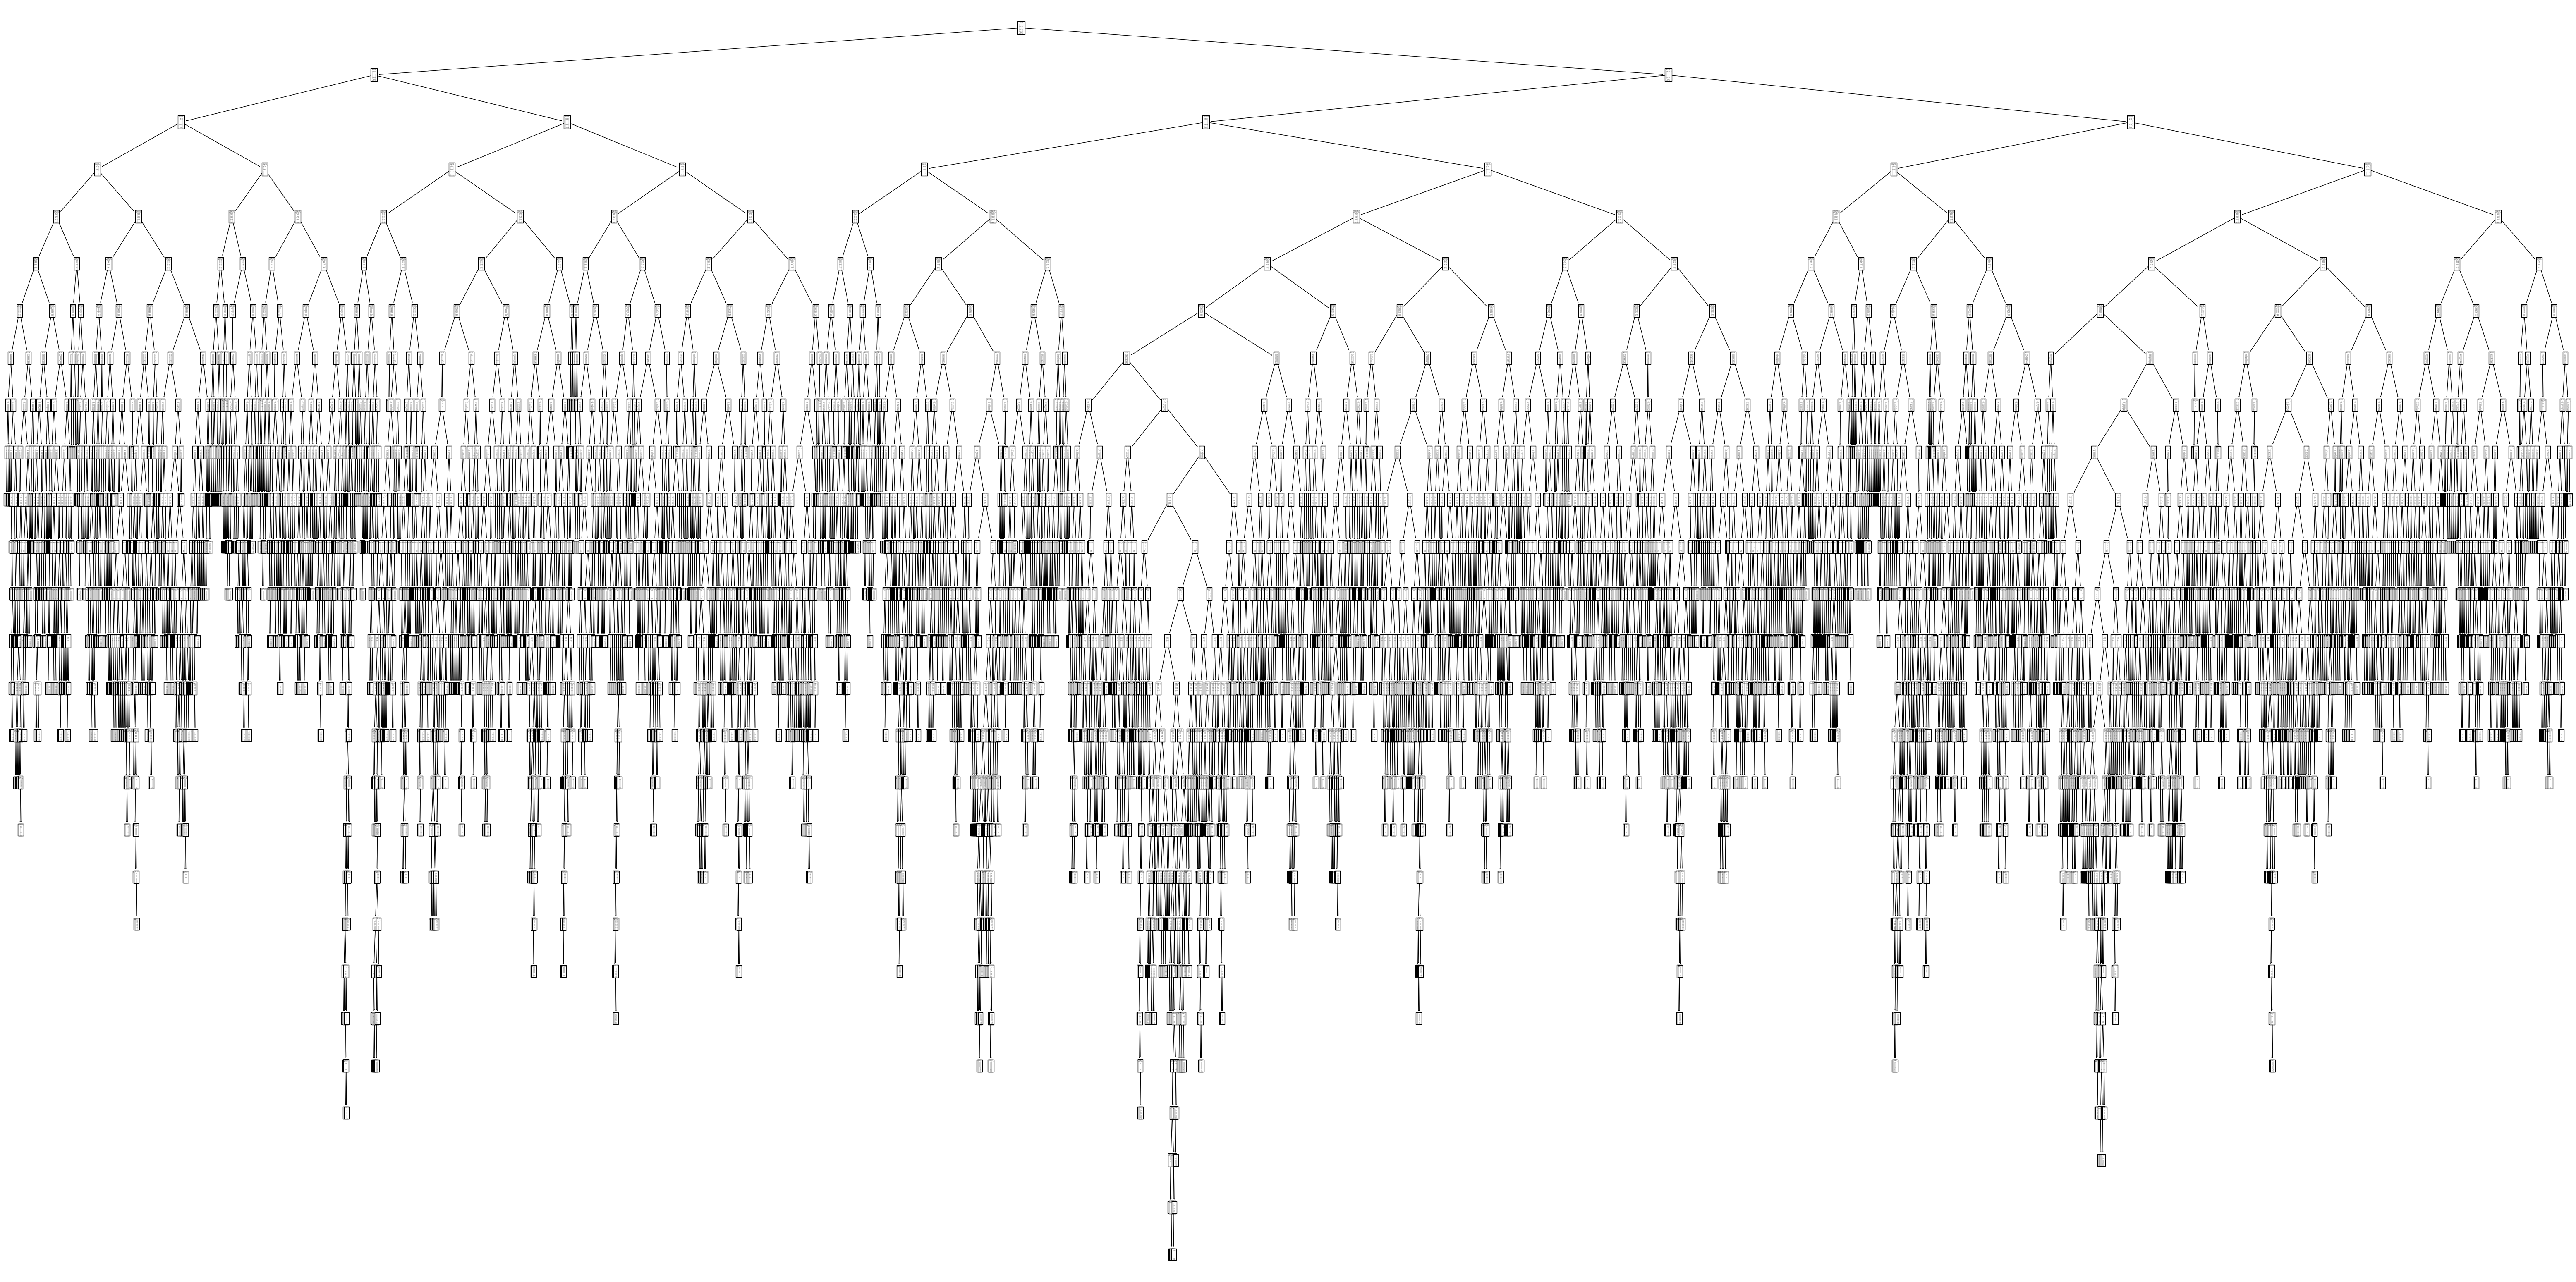

In [19]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[1], class_names=act);
#, feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True); max_depth = 4, 

In [20]:
save_path = r'C:\Users\Michael\Desktop\Career Foundry\03 Machine Learning\02 Real-World Applications of Machine Learning\2.03 Complex Machine Learning Models and Keras Part 2'

fig.savefig(f"{save_path}/decision_tree_weatherAll-01.png")

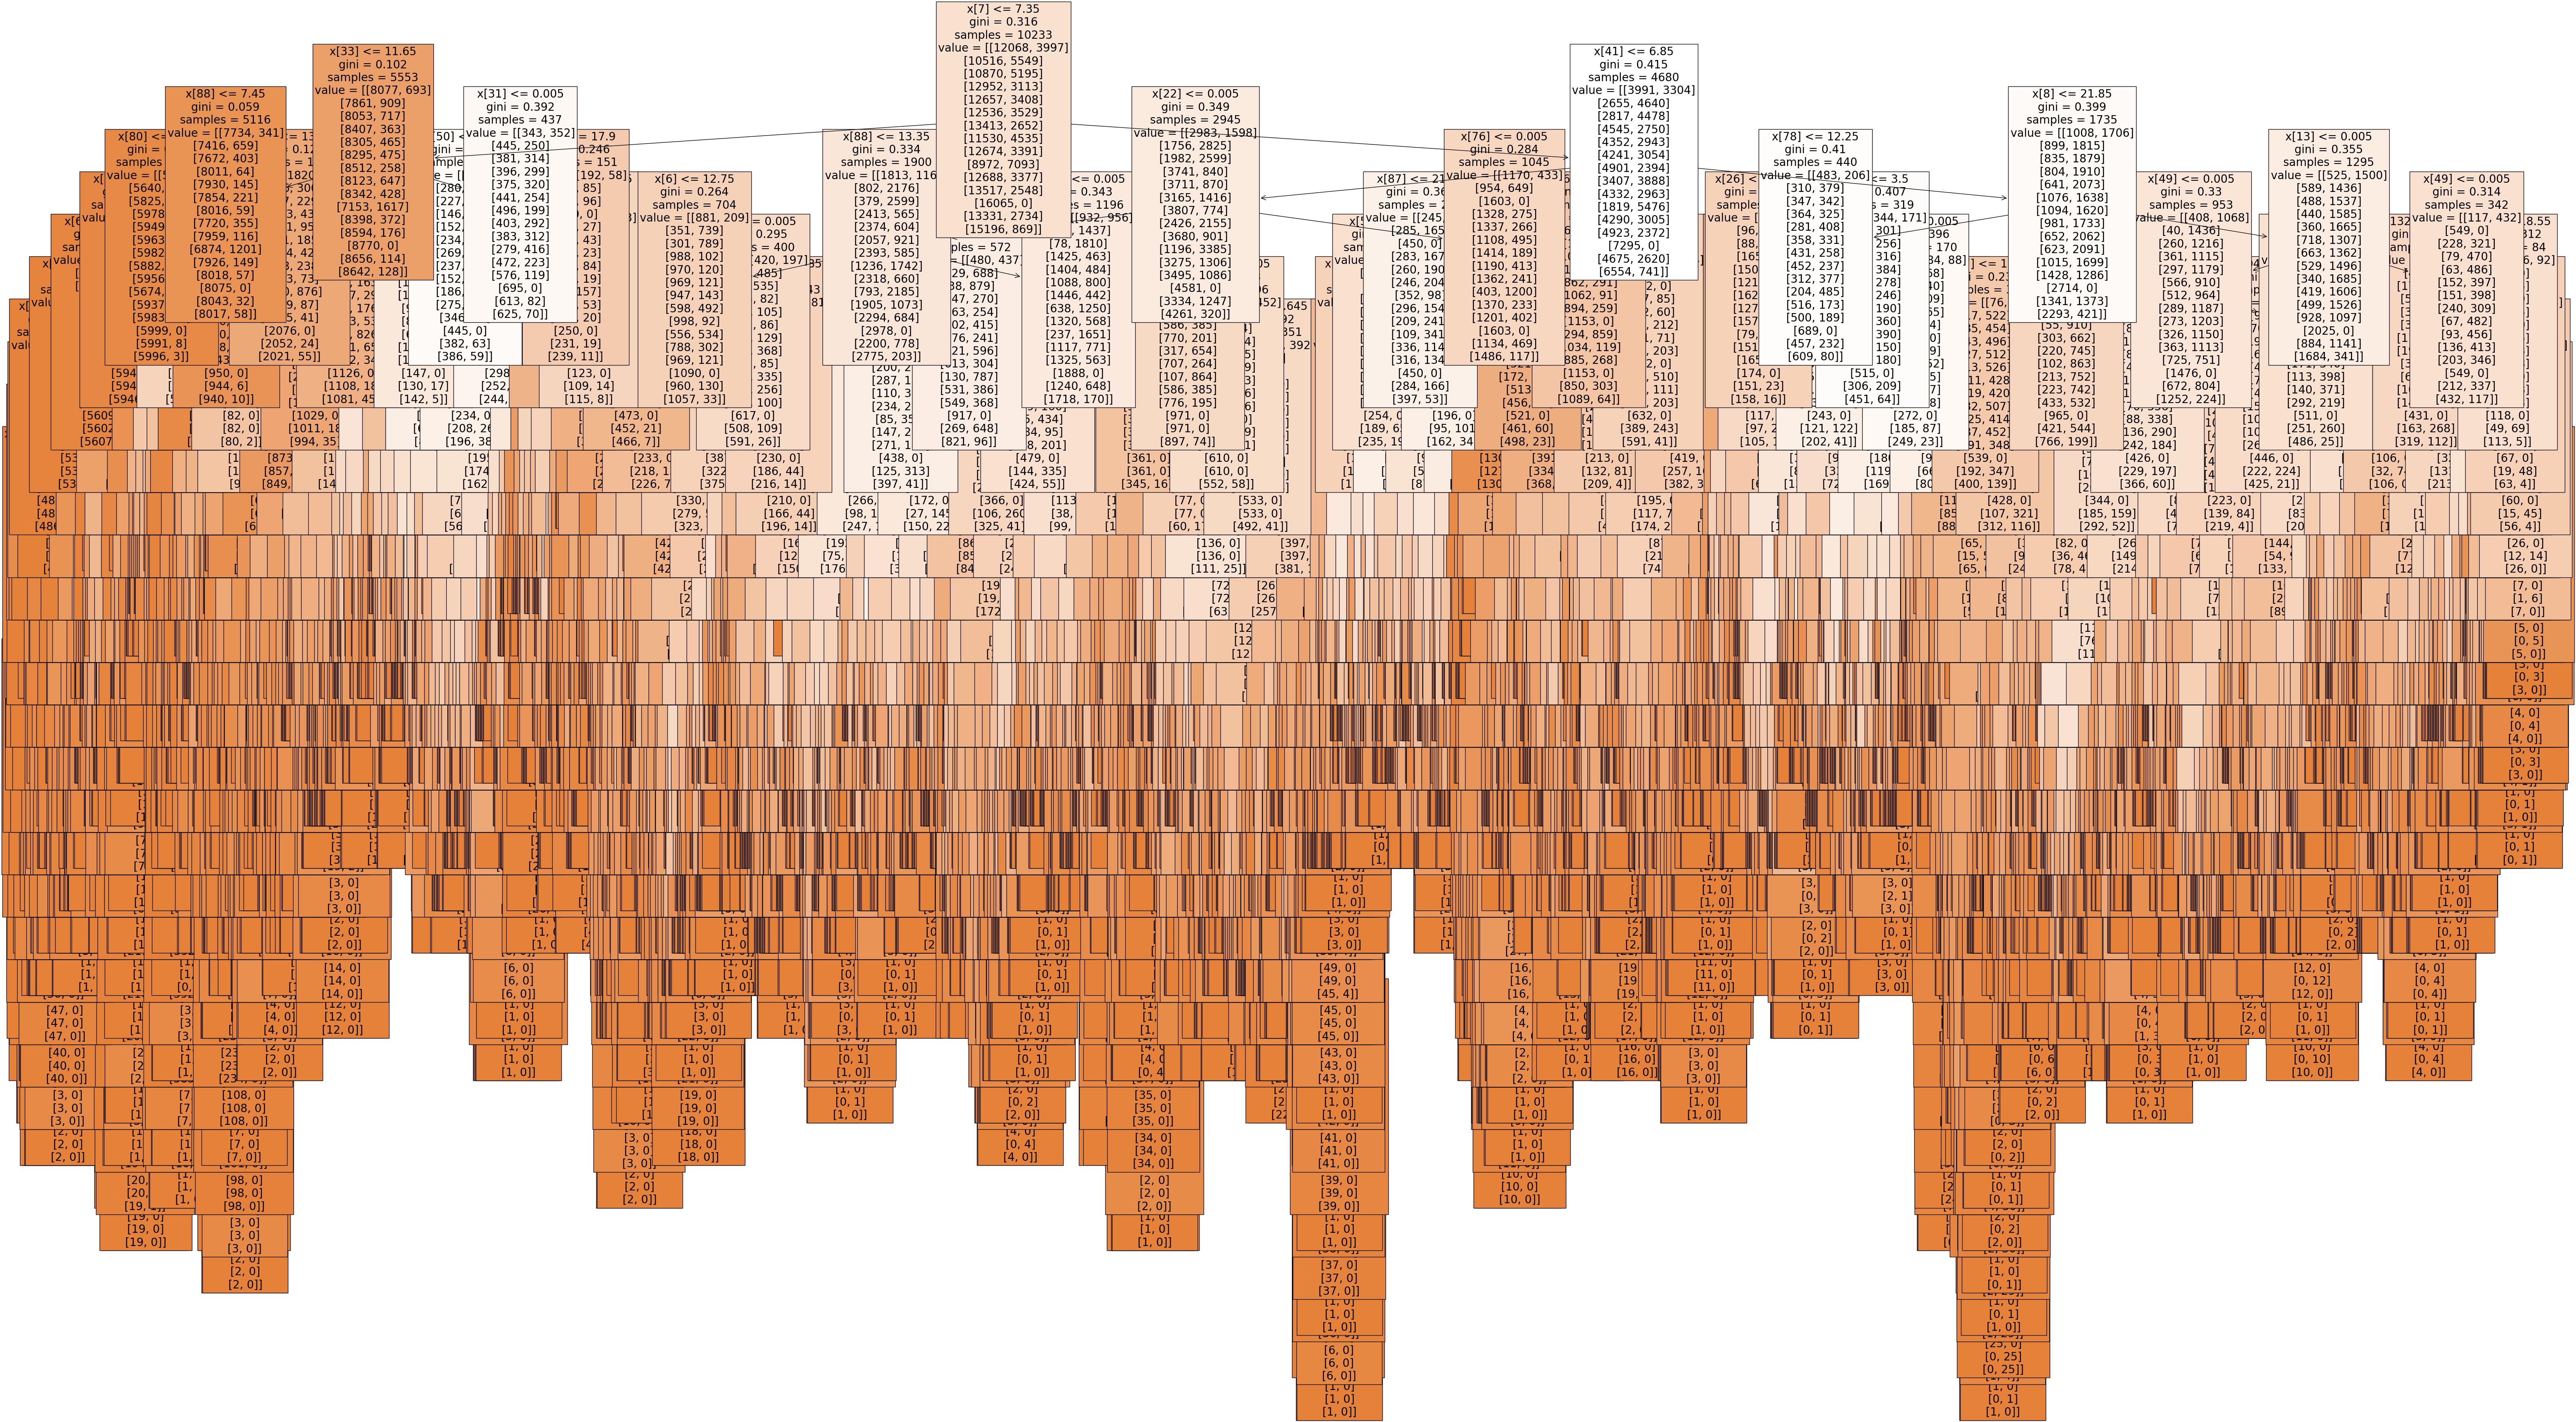

In [21]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[99], fontsize = 20, class_names=act, filled=True);

In [22]:
fig.savefig(f"{save_path}/decision_tree_weatherAll-02.png")

# Find the most relevant locations

In [23]:
np.set_printoptions(threshold=np.inf)
newarray = clf.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([0.00248406, 0.00269361, 0.00197227, 0.0037389 , 0.01997785,
       0.006475  , 0.01121092, 0.00726888, 0.0299982 , 0.00358625,
       0.00312034, 0.00291945, 0.00316281, 0.02093703, 0.00355164,
       0.00503344, 0.00256596, 0.01199739, 0.00151711, 0.00175359,
       0.00182426, 0.00300096, 0.01807579, 0.00327842, 0.00485286,
       0.00506077, 0.01913824, 0.00236494, 0.00244558, 0.00389784,
       0.00409408, 0.01713742, 0.00450551, 0.01840889, 0.0022603 ,
       0.04004047, 0.00447609, 0.00241574, 0.00277834, 0.00323247,
       0.02057275, 0.0106465 , 0.01628584, 0.00216473, 0.02699673,
       0.00184523, 0.00294228, 0.00353363, 0.00422386, 0.01069183,
       0.0032395 , 0.01264417, 0.00238915, 0.01927736, 0.00294497,
       0.00258034, 0.00320279, 0.00327636, 0.0136185 , 0.00354716,
       0.00455759, 0.0023585 , 0.00904763, 0.00296134, 0.00302777,
       0.00282619, 0.00340144, 0.02101803, 0.00396411, 0.01674343,
       0.0023693 , 0.02737434, 0.00846381, 0.00276691, 0.00361

In [24]:
np.set_printoptions(threshold=1000)

In [25]:
newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[0.00248406, 0.00269361, 0.00197227, 0.0037389 , 0.01997785,
         0.006475  , 0.01121092, 0.00726888, 0.0299982 ],
        [0.00358625, 0.00312034, 0.00291945, 0.00316281, 0.02093703,
         0.00355164, 0.00503344, 0.00256596, 0.01199739],
        [0.00151711, 0.00175359, 0.00182426, 0.00300096, 0.01807579,
         0.00327842, 0.00485286, 0.00506077, 0.01913824],
        [0.00236494, 0.00244558, 0.00389784, 0.00409408, 0.01713742,
         0.00450551, 0.01840889, 0.0022603 , 0.04004047],
        [0.00447609, 0.00241574, 0.00277834, 0.00323247, 0.02057275,
         0.0106465 , 0.01628584, 0.00216473, 0.02699673],
        [0.00184523, 0.00294228, 0.00353363, 0.00422386, 0.01069183,
         0.0032395 , 0.01264417, 0.00238915, 0.01927736],
        [0.00294497, 0.00258034, 0.00320279, 0.00327636, 0.0136185 ,
         0.00354716, 0.00455759, 0.0023585 , 0.00904763],
        [0.00296134, 0.00302777, 0.00282619, 0.00340144, 0.02101803,
         0.00396411, 0.01674343, 0.0023693

In [26]:
sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.08581969, 0.05687431, 0.05850201, 0.09515504, 0.08956918,
       0.06078701, 0.04513385, 0.08368594, 0.11248085, 0.07269003,
       0.07411126, 0.05798134, 0.02657098, 0.05759395, 0.02304457])

In [27]:
important = pd.Series(sumarray, index = locations) #.sort_values(ascending = False)
important

BASEL         0.085820
BELGRADE      0.056874
BUDAPEST      0.058502
DEBILT        0.095155
DUSSELDORF    0.089569
HEATHROW      0.060787
KASSEL        0.045134
LJUBLJANA     0.083686
MAASTRICHT    0.112481
MADRID        0.072690
MUNCHENB      0.074111
OSLO          0.057981
SONNBLICK     0.026571
STOCKHOLM     0.057594
VALENTIA      0.023045
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


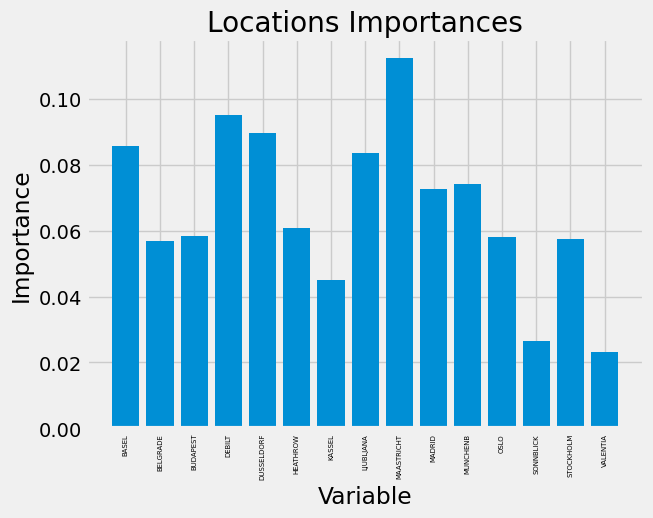

In [28]:
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(signals)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, locations, rotation = 'vertical', fontsize = 5)
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Locations Importances')
plt.savefig(f"{save_path}/Location_ImportancesAll.png")

### Most important places are:
Deblit

Dusseldorf

Maastricht

Though these are closely followed by Munchen, and Basel.

# Find the most important measures

In [29]:
np.set_printoptions(threshold=np.inf)
newarray = clf.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([0.00248406, 0.00269361, 0.00197227, 0.0037389 , 0.01997785,
       0.006475  , 0.01121092, 0.00726888, 0.0299982 , 0.00358625,
       0.00312034, 0.00291945, 0.00316281, 0.02093703, 0.00355164,
       0.00503344, 0.00256596, 0.01199739, 0.00151711, 0.00175359,
       0.00182426, 0.00300096, 0.01807579, 0.00327842, 0.00485286,
       0.00506077, 0.01913824, 0.00236494, 0.00244558, 0.00389784,
       0.00409408, 0.01713742, 0.00450551, 0.01840889, 0.0022603 ,
       0.04004047, 0.00447609, 0.00241574, 0.00277834, 0.00323247,
       0.02057275, 0.0106465 , 0.01628584, 0.00216473, 0.02699673,
       0.00184523, 0.00294228, 0.00353363, 0.00422386, 0.01069183,
       0.0032395 , 0.01264417, 0.00238915, 0.01927736, 0.00294497,
       0.00258034, 0.00320279, 0.00327636, 0.0136185 , 0.00354716,
       0.00455759, 0.0023585 , 0.00904763, 0.00296134, 0.00302777,
       0.00282619, 0.00340144, 0.02101803, 0.00396411, 0.01674343,
       0.0023693 , 0.02737434, 0.00846381, 0.00276691, 0.00361

In [30]:
np.set_printoptions(threshold=1000)

In [31]:
newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[0.00248406, 0.00269361, 0.00197227, 0.0037389 , 0.01997785,
         0.006475  , 0.01121092, 0.00726888, 0.0299982 ],
        [0.00358625, 0.00312034, 0.00291945, 0.00316281, 0.02093703,
         0.00355164, 0.00503344, 0.00256596, 0.01199739],
        [0.00151711, 0.00175359, 0.00182426, 0.00300096, 0.01807579,
         0.00327842, 0.00485286, 0.00506077, 0.01913824],
        [0.00236494, 0.00244558, 0.00389784, 0.00409408, 0.01713742,
         0.00450551, 0.01840889, 0.0022603 , 0.04004047],
        [0.00447609, 0.00241574, 0.00277834, 0.00323247, 0.02057275,
         0.0106465 , 0.01628584, 0.00216473, 0.02699673],
        [0.00184523, 0.00294228, 0.00353363, 0.00422386, 0.01069183,
         0.0032395 , 0.01264417, 0.00238915, 0.01927736],
        [0.00294497, 0.00258034, 0.00320279, 0.00327636, 0.0136185 ,
         0.00354716, 0.00455759, 0.0023585 , 0.00904763],
        [0.00296134, 0.00302777, 0.00282619, 0.00340144, 0.02101803,
         0.00396411, 0.01674343, 0.0023693

In [32]:
sumarray = np.sum(newarray[0], axis=0)
sumarray

array([0.04312836, 0.03959484, 0.04322662, 0.05142063, 0.21637654,
       0.06710457, 0.17786659, 0.059163  , 0.30211886])

In [33]:
important = pd.Series(sumarray, index = signals) #.sort_values(ascending = False)
important

cloud_cover         0.043128
humidity            0.039595
pressure            0.043227
global_radiation    0.051421
precipitation       0.216377
sunshine            0.067105
temp_mean           0.177867
temp_min            0.059163
temp_max            0.302119
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


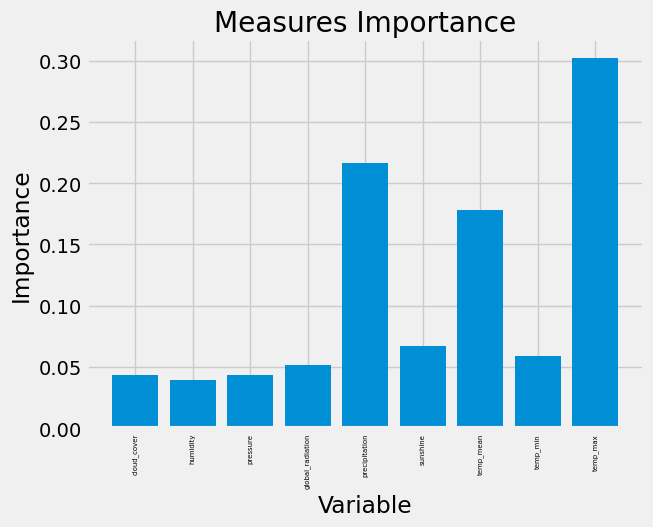

In [34]:
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(signals)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, signals, rotation = 'vertical', fontsize = 5)
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Measures Importance')
plt.savefig(f"{save_path}/Measure_ImportancesAll.png")

### The most improatnt measures are:
precipitation

temp_mean

temp_max

They are significantly more important than the other measures of 'pleasantness'.

they are also better at indicating than any of the individual locations.